In [1]:
%matplotlib ipympl

import matplotlib.pyplot as plt
import pandas as pd
from pymoo.indicators.hv import HV
import numpy as np

# NSGA-II

In [2]:
methods = [
    "single-cutcat-unif",
    "multi-cutcat-unif",
    "single-cutcat-tour",
    "multi-cutcat-tour"
]

def nsga2_plot3d(df, name, e=40, a=-146, v=None):
    fig = plt.figure()
    axes = plt.axes(projection='3d')
    # if v != None:
    #     x, y, z = v
    #     axes.scatter3D([x], [y], [z], label="Reference point")
    for m in methods:
        to_use = df[df["method"] == m]

        axes.scatter3D(to_use['build_time'], to_use['search_time'], to_use['recall'], label=m)
        axes.set_xlabel('build_time')
        axes.set_ylabel('search_time')
        axes.set_zlabel('recall')

        axes.view_init(elev=e, azim=a)
        
    plt.legend()
    plt.savefig(f'../images/report/{name}.png')
    plt.show()

In [3]:
non_scaling = pd.read_csv("result-non-scaling.csv")
non_scaling_frontier = pd.read_csv("result-non-scaling-frontier.csv")

scaling = pd.read_csv("result-scaling.csv")
scaling_frontier = pd.read_csv("result-scaling-frontier.csv")

## Non-scaling

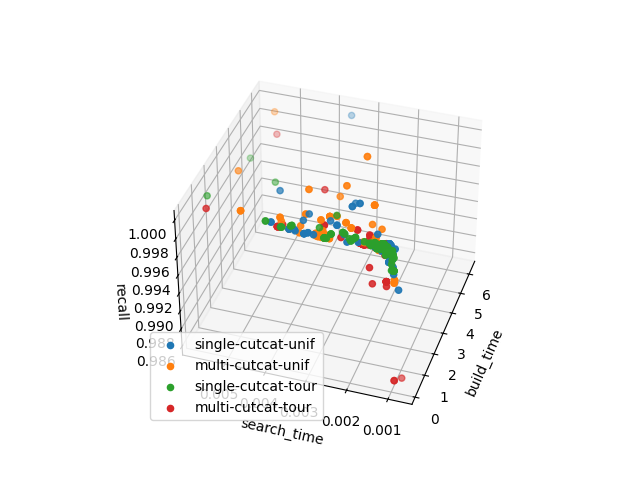

In [4]:
nsga2_plot3d(non_scaling, "non-scaling", 37, -162)

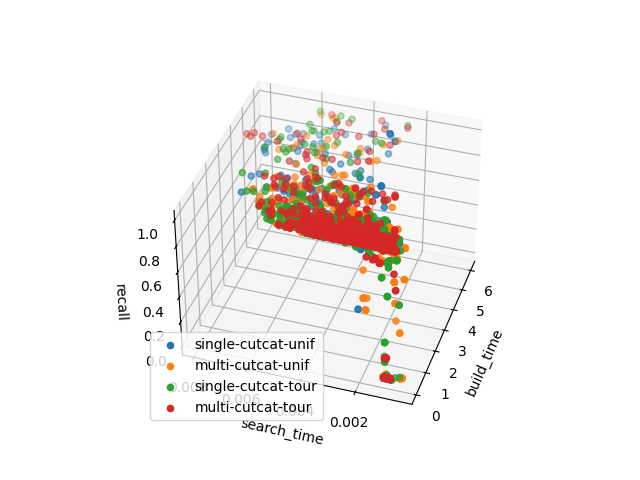

In [5]:
rp = [7, 0.01, 1]
ind = HV(ref_point=rp)
nsga2_plot3d(non_scaling_frontier, "non-scaling-frontier", 37, -162, rp)

In [6]:
for m in methods:
    to_use = non_scaling_frontier[non_scaling_frontier["method"] == m]
    print(f"HV of {m}:", 
          ind(np.array([to_use["build_time"], to_use["search_time"], 1 - to_use["recall"]]).transpose()))

HV of single-cutcat-unif: 0.06277562259796854
HV of multi-cutcat-unif: 0.06548161972689544
HV of single-cutcat-tour: 0.06404157011875183
HV of multi-cutcat-tour: 0.06332794210836813


In [7]:
def compute_row_hv(row):
    b = row["build_time"]
    s = row["search_time"]
    r = row["recall"]
    return ind(np.array([b, s, 1 - r]))

non_scaling_frontier["hv"] = non_scaling_frontier.apply(compute_row_hv, axis=1)
sorted_nsf = non_scaling_frontier.sort_values(by="hv", ascending=False)[:5]
print(sorted_nsf.drop(["method", "generation", "build_time", "memory", "search_time", "recall"], axis=1).to_latex())
sorted_nsf

\begin{tabular}{lrrrrrr}
\toprule
 & trial & max_deg & size_construction & size_search & alpha & hv \\
\midrule
513 & 1 & 26 & 153 & 107 & 1.156250 & 0.062123 \\
524 & 1 & 26 & 153 & 107 & 1.156250 & 0.062123 \\
506 & 1 & 26 & 153 & 107 & 1.156250 & 0.062123 \\
4952 & 17 & 734 & 113 & 104 & 1.143555 & 0.061994 \\
4960 & 17 & 734 & 113 & 104 & 1.143555 & 0.061994 \\
\bottomrule
\end{tabular}



,trial,generation,method,max_deg,size_construction,size_search,alpha,build_time,memory,search_time,recall,hv
513,1,9,multi-cutcat-tour,26,153,107,1.156250,0.174571,0,0.000840,0.9936,0.062123
524,1,10,multi-cutcat-tour,26,153,107,1.156250,0.174571,0,0.000840,0.9936,0.062123
506,1,8,multi-cutcat-tour,26,153,107,1.156250,0.174571,0,0.000840,0.9936,0.062123
4952,17,9,multi-cutcat-tour,734,113,104,1.143555,0.155393,0,0.000897,0.9950,0.061994
4960,17,10,multi-cutcat-tour,734,113,104,1.143555,0.155393,0,0.000897,0.9950,0.061994


## Scaling

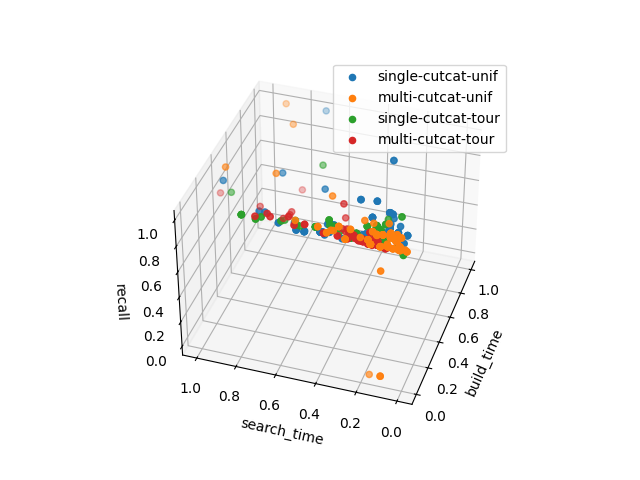

In [8]:
nsga2_plot3d(scaling, "scaling", 37, -162)

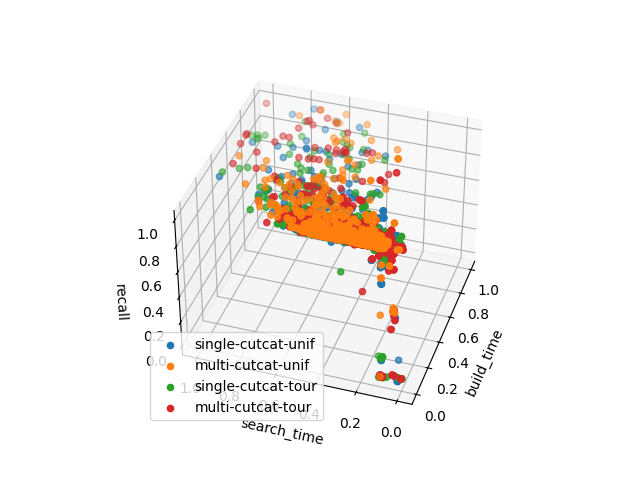

HV of single-cutcat-unif: 0.939270631330445
HV of multi-cutcat-unif: 0.9596907189585544
HV of single-cutcat-tour: 0.9610305593489753
HV of multi-cutcat-tour: 0.9643278988617474


In [9]:
rp = [1, 1, 1]
nsga2_plot3d(scaling_frontier, "scaling-frontier", 37, -162, rp)
for m in methods:
    to_use = scaling_frontier[scaling_frontier["method"] == m]
    ind = HV(ref_point=rp)
    print(f"HV of {m}:", 
          ind(np.array([to_use["build_time"], to_use["search_time"], 1 - to_use["recall"]]).transpose()))

In [10]:
def compute_row_hv(row):
    b = row["build_time"]
    s = row["search_time"]
    r = row["recall"]
    return ind(np.array([b, s, 1 - r]))

scaling_frontier["hv"] = scaling_frontier.apply(compute_row_hv, axis=1)
sorted_sf = scaling_frontier.sort_values(by="hv", ascending=False)[:5]
print(sorted_sf.drop(["method", "generation", "build_time", "memory", "search_time", "recall"], axis=1).to_latex())
sorted_sf

\begin{tabular}{lrrrrrr}
\toprule
 & trial & max_deg & size_construction & size_search & alpha & hv \\
\midrule
228 & 0 & 182 & 200 & 119 & 1.036133 & 0.942695 \\
217 & 0 & 182 & 200 & 119 & 1.036133 & 0.942695 \\
93 & 0 & 483 & 168 & 124 & 1.090820 & 0.930871 \\
294 & 1 & 978 & 178 & 124 & 1.151367 & 0.927025 \\
214 & 0 & 162 & 199 & 135 & 1.035156 & 0.926820 \\
\bottomrule
\end{tabular}



,trial,generation,method,max_deg,size_construction,size_search,alpha,build_time,memory,search_time,recall,hv
228,0,10,multi-cutcat-tour,182,200,119,1.036133,0.035913,0,0.020327,0.9981,0.942695
217,0,9,multi-cutcat-tour,182,200,119,1.036133,0.035913,0,0.020327,0.9981,0.942695
93,0,10,multi-cutcat-unif,483,168,124,1.090820,0.032308,0,0.036412,0.9983,0.930871
294,1,6,multi-cutcat-unif,978,178,124,1.151367,0.027989,0,0.044753,0.9984,0.927025
214,0,8,multi-cutcat-tour,162,199,135,1.035156,0.036311,0,0.037488,0.9992,0.926820


# Weighted Sum with BO

In [11]:
def load_and_plot_ws(path):
    weighting = path.split("-")[2].split(".")[0]

    results = pd.read_csv(path).set_index("iter")
    bests = results.sort_values(by="ws")[:10]
    # results = results.sort_values(by="ws")[10:]
    # fig = plt.figure()
    # combs = [("M", "C"), ("M", "S"), ("M", "alpha"), ("C", "S"), ("C", "alpha"), ("S", "alpha")]
    # for i, com in enumerate(combs):
    #     c1, c2 = com
    #     axes = plt.axes(projection='3d')
    #     axes.scatter3D(results[c1], results[c2], abs(results["ws"] - 3), label="The rest", color="grey")
    #     axes.scatter3D(bests[c1], bests[c2], abs(bests["ws"] - 3), label="Top 10", color="red")

    #     axes.set_xlabel(c1)
    #     axes.set_ylabel(c2)
    #     axes.set_zlabel('Weighted sum')
    #     axes.view_init(elev=25, azim=-145)

    #     plt.legend()
    #     plt.show()
    #     plt.savefig(f"./images/report/w{weighting}-{c1}-{c2}.png")

    # params = ["M", "C", "S", "alpha"]
    # for p in params:
    #     r = results.sort_values(by=p)
    #     fig, ax = plt.subplots(1)
    #     ax.scatter(r[p], r["ws"], label="All points")
    #     ax.scatter(bests[p], bests["ws"], label="Top 10")

    #     ax.set_xlabel(p)
    #     ax.set_ylabel("Weighted sum")

    #     plt.legend()
    #     plt.show()
    #     plt.savefig(f"../images/report/w{weighting}-{p}.png", bbox_inches="tight")

    # return bests.to_latex(), bests.mean()
    mean_pd = pd.DataFrame(bests.mean())
    mean_pd["Mean"] = bests.mean()
    # mean_pd = mean_pd.drop("0", axis=1)
    mean_pd = mean_pd.transpose()[1:]
    return pd.concat([bests, mean_pd]).to_latex()

# for thing in load_and_plot_ws("bo-small-111.csv"):
#     print(thing)
print(load_and_plot_ws("bo-small-111.csv"))

\begin{tabular}{lrrrrr}
\toprule
 & M & C & S & alpha & ws \\
\midrule
10 & 294.000000 & 899.000000 & 225.000000 & 1.173432 & 0.014431 \\
11 & 295.000000 & 908.000000 & 198.000000 & 1.176635 & 0.018637 \\
28 & 209.000000 & 385.000000 & 386.000000 & 1.173622 & 0.059893 \\
66 & 13.000000 & 111.000000 & 461.000000 & 1.102408 & 0.062545 \\
52 & 422.000000 & 290.000000 & 331.000000 & 1.069600 & 0.063003 \\
32 & 238.000000 & 366.000000 & 387.000000 & 1.157287 & 0.063207 \\
22 & 237.000000 & 945.000000 & 156.000000 & 1.154125 & 0.064826 \\
20 & 263.000000 & 892.000000 & 192.000000 & 1.171215 & 0.065713 \\
9 & 277.000000 & 929.000000 & 227.000000 & 1.214441 & 0.067455 \\
27 & 231.000000 & 413.000000 & 383.000000 & 1.183549 & 0.068332 \\
Mean & 247.900000 & 613.800000 & 294.600000 & 1.157631 & 0.054804 \\
\bottomrule
\end{tabular}



In [12]:
# print(load_and_plot_ws("bo-small-112.csv"))

In [13]:
# print(load_and_plot_ws("bo-small-221.csv"))

In [14]:
# print(load_and_plot_ws("bo-small-123.csv"))

In [15]:
# paths = [f"bo-small-{w}.csv" for w in ["111", "112", "221", "123"]]
# small_results = []
# for path, w in zip(paths, ["111", "112", "221", "123"]):
#     r = pd.read_csv(path).set_index("iter")
#     small_results.append(r.sort_values(by="ws")[:10])
# results = pd.concat(small_results)
# bests = results.sort_values(by="ws")[:10]
# fig = plt.figure()


# params = ["M", "C", "S", "alpha"]
# for p in params:
#     r = results.sort_values(by=p)
#     fig, ax = plt.subplots(1)
#     ax.scatter(r[p], r["ws"], label="All points")
#     ax.scatter(bests[p], bests["ws"], label="Top 10")

#     ax.set_xlabel(p)
#     ax.set_ylabel("Weighted sum")

#     plt.legend()
#     plt.show()
#     plt.savefig(f"../images/report/wall-{p}.png", bbox_inches="tight")

# mean_pd = pd.DataFrame(bests.mean())
# mean_pd["Mean"] = bests.mean()
# mean_pd = mean_pd.transpose()[1:]
# print( pd.concat([bests, mean_pd]).to_latex())